# 1章 ウェブの注文数を分析する

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

work_dir = 'WORKING_DIRECTORY'

## 001. データの読み込み

In [ ]:
customer_master = pd.read_csv(f'{work_dir}/customer_master.csv')
customer_master.head()

In [ ]:
item_master = pd.read_csv(f'{work_dir}/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [ ]:
transaction_1 = pd.read_csv(f'{work_dir}/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
transaction_detail_1 = pd.read_csv(f'{work_dir}/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


## 002. データの結合

In [ ]:
transaction_2 = pd.read_csv(f'{work_dir}/transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2]).reset_index(drop=True)
transaction[::int(len(transaction)/5)]

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1357,T0000001470,100000,2019-03-07 21:50:05,PL077120
2714,T0000002827,120000,2019-04-13 21:19:38,PL746077
4071,T0000004184,210000,2019-05-20 10:18:01,HD509520
5428,T0000005541,210000,2019-06-26 15:24:33,GD804357
6785,T0000006898,85000,2019-07-31 23:41:38,AS834214


In [ ]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [ ]:
transaction_detail_2 = pd.read_csv(f'{work_dir}/transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2]).reset_index(drop=True)
transaction_detail[::int(len(transaction_detail)/5)]

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1428,1428,T0000001471,S001,1
2856,2856,T0000002832,S001,1
4284,4284,T0000004191,S001,1
5712,5712,T0000005542,S005,2
7140,7140,T0000006895,S002,1


In [ ]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


## 003. 売上データ同士の結合

In [ ]:
all_transactions = pd.merge(transaction_detail, transaction.drop('price', axis=1), on='transaction_id', how='left')
all_transactions.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


## 004. マスターデータの結合

In [ ]:
customer_transaction = pd.merge(all_transactions, customer_master, on='customer_id', how='left')
customer_transaction.head()

In [ ]:
master_data = pd.merge(customer_transaction, item_master, on='item_id', how='left')
master_data.head()

## 005. price列の追加

In [ ]:
master_data['price'] = master_data['quantity'] * master_data['item_price']
master_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## 006. データ検算

In [ ]:
print(transaction['price'].sum())
print(master_data['price'].sum())

971135000
971135000


## 007. 各種統計量の把握

In [ ]:
master_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [ ]:
master_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f431bc8cc50>,
      dtype=object)

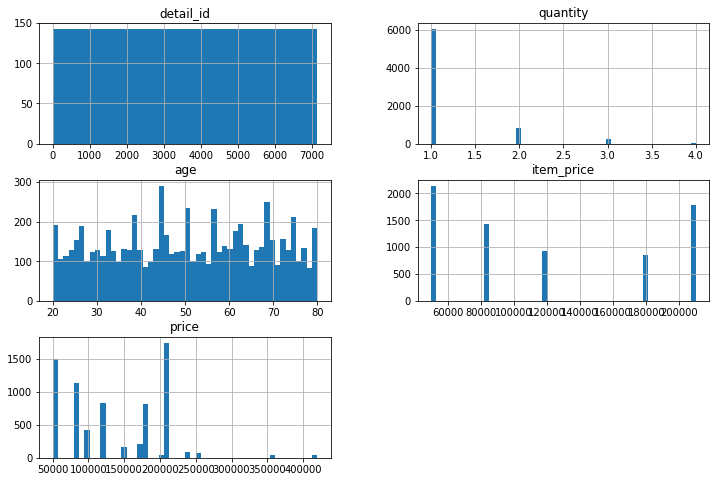

In [ ]:
master_data.hist(bins=50, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f432c4f7090>,
      dtype=object)

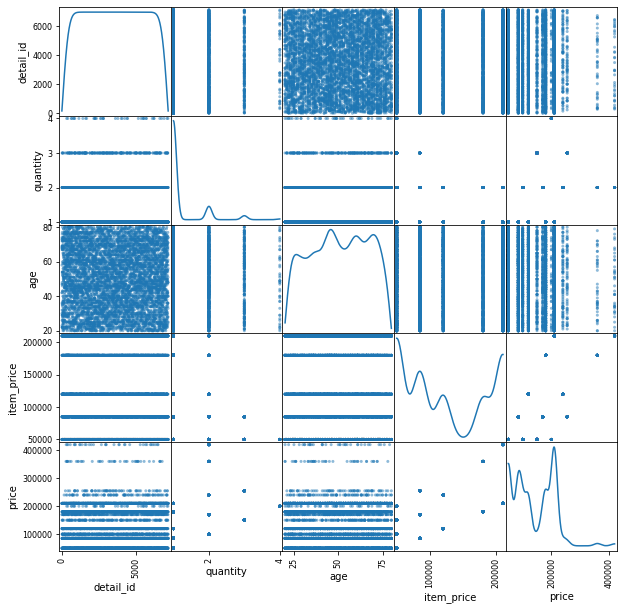

In [ ]:
pd.plotting.scatter_matrix(master_data, diagonal='kde', figsize=(10, 10))

## 008. 月別でのデータ集計

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   detail_id           7144 non-null   int64 
 1   transaction_id      7144 non-null   object
 2   item_id             7144 non-null   object
 3   quantity            7144 non-null   int64 
 4   payment_date        7144 non-null   object
 5   customer_id         7144 non-null   object
 6   customer_name       7144 non-null   object
 7   registration_date   7144 non-null   object
 8   customer_name_kana  7144 non-null   object
 9   email               7144 non-null   object
 10  gender              7144 non-null   object
 11  age                 7144 non-null   int64 
 12  birth               7144 non-null   object
 13  pref                7144 non-null   object
 14  item_name           7144 non-null   object
 15  item_price          7144 non-null   int64 
 16  price               7144

In [ ]:
master_data['payment_date'] = pd.to_datetime(master_data['payment_date'])
master_data['payment_month'] = master_data['payment_date'].dt.strftime('%Y/%m')
master_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,2019/02
1,2019-02-01 01:37:23,2019/02
2,2019-02-01 02:34:19,2019/02
3,2019-02-01 02:47:23,2019/02
4,2019-02-01 04:33:46,2019/02


In [ ]:
quant_price_per_month = master_data.groupby('payment_month').sum()[['quantity', 'price']]
quant_price_per_month

,quantity,price
payment_month,,
2019/02,1403,160185000
2019/03,1427,160370000
2019/04,1421,160510000
2019/05,1390,155420000
2019/06,1446,164030000
2019/07,1485,170620000


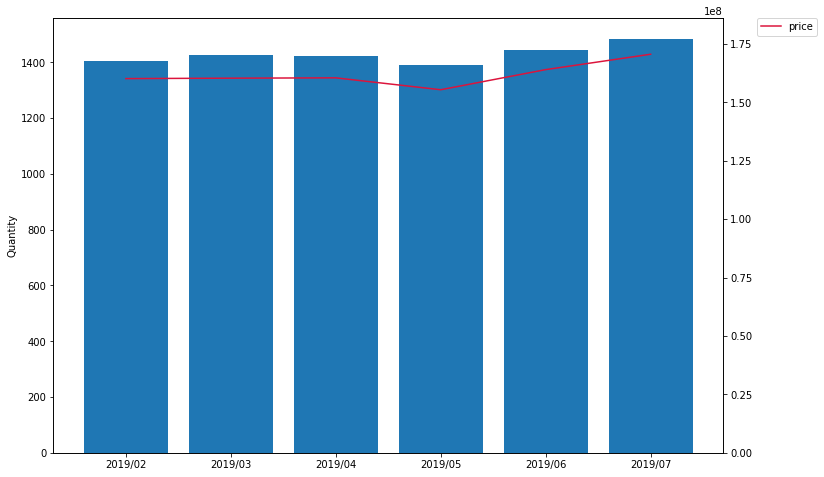

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(quant_price_per_month.index, quant_price_per_month['quantity'], label='quantity')
ax1.set_ylabel('Quantity')
ax_price = ax1.twinx()
ax_price.plot(quant_price_per_month.index, quant_price_per_month['price'], label='price', color='crimson')
plt.ylim(0, quant_price_per_month['price'].max()+quant_price_per_month['price'].min()/10)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0,), borderaxespad=0)
plt.show()

## 009. 月別、商品別でデータ集計

In [ ]:
master_data.groupby(['payment_month', 'item_name']).sum()[['quantity', 'price']]

quantity     price
payment_month item_name                    
2019/02       PC-A            483  24150000
              PC-B            297  25245000
              PC-C            165  19800000
              PC-D            173  31140000
              PC-E            285  59850000
2019/03       PC-A            520  26000000
              PC-B            300  25500000
              PC-C            159  19080000
              PC-D            143  25740000
              PC-E            305  64050000
2019/04       PC-A            518  25900000
              PC-B            276  23460000
              PC-C            183  21960000
              PC-D            135  24300000
              PC-E            309  64890000
2019/05       PC-A            497  24850000
              PC-B            298  25330000
              PC-C            171  20520000
              PC-D            144  25920000
              PC-E            280  58800000
2019/06       PC-A            520  26000000
              PC-B            282  23970000
              PC-C            182  21840000
              PC-D            160  28800000
              PC-E            302  63420000
2019/07       PC-A            505  25250000
              PC-B            332  28220000
              PC-C            162  19440000
              PC-D            145  26100000
              PC-E            341  71610000

In [ ]:
pd.pivot_table(master_data, index='item_name', columns='payment_month', values=['quantity', 'price'], aggfunc='sum')

price                      ... quantity                
payment_month   2019/02   2019/03   2019/04  ...  2019/05 2019/06 2019/07
item_name                                    ...                         
PC-A           24150000  26000000  25900000  ...      497     520     505
PC-B           25245000  25500000  23460000  ...      298     282     332
PC-C           19800000  19080000  21960000  ...      171     182     162
PC-D           31140000  25740000  24300000  ...      144     160     145
PC-E           59850000  64050000  64890000  ...      280     302     341

[5 rows x 12 columns]

## 商品別の売上推移の可視化

In [ ]:
graph_data = pd.pivot_table(master_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019/02,24150000,25245000,19800000,31140000,59850000
2019/03,26000000,25500000,19080000,25740000,64050000
2019/04,25900000,23460000,21960000,24300000,64890000
2019/05,24850000,25330000,20520000,25920000,58800000
2019/06,26000000,23970000,21840000,28800000,63420000
2019/07,25250000,28220000,19440000,26100000,71610000


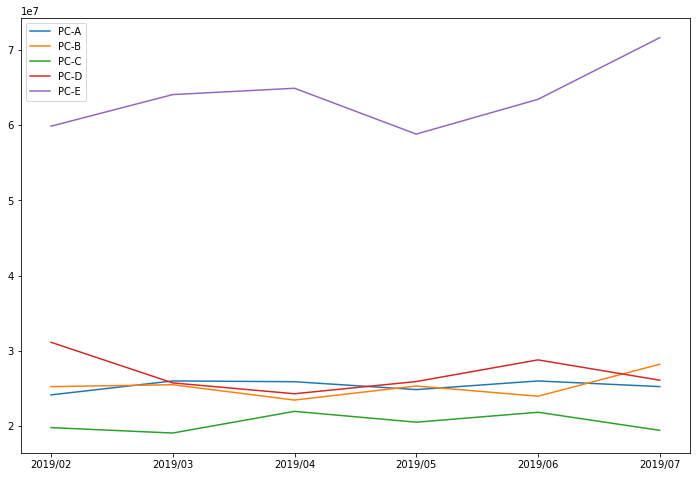

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(graph_data.index, graph_data['PC-A'], label='PC-A')
ax.plot(graph_data.index, graph_data['PC-B'], label='PC-B')
ax.plot(graph_data.index, graph_data['PC-C'], label='PC-C')
ax.plot(graph_data.index, graph_data['PC-D'], label='PC-D')
ax.plot(graph_data.index, graph_data['PC-E'], label='PC-E')
ax.legend()